Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import kaggle

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display, Markdown


In [25]:
import pandas as pd

# Percorsi dei file
train_path = "~/Documents/My Projects/Prediction/Binary Prediction with a Rainfall Dataset/playground-series-s5e3/train.csv"
test_path = "~/Documents/My Projects/Prediction/Binary Prediction with a Rainfall Dataset/playground-series-s5e3/test.csv"

# Dataset load
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Visualizzare le prime righe
display(train_df.head().style.set_caption("Train Dataset"))


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.400000,21.200000,20.600000,19.900000,19.400000,87.000000,88.000000,1.100000,60.000000,17.200000,1
1,1,2,1019.500000,16.200000,16.900000,15.800000,15.400000,95.000000,91.000000,0.000000,50.000000,21.900000,1
2,2,3,1024.100000,19.400000,16.100000,14.600000,9.300000,75.000000,47.000000,8.300000,70.000000,18.100000,1
3,3,4,1013.400000,18.100000,17.800000,16.900000,16.800000,95.000000,95.000000,0.000000,60.000000,35.600000,1
4,4,5,1021.800000,21.300000,18.400000,15.200000,9.600000,52.000000,45.000000,3.600000,40.000000,24.800000,0


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.500000,17.500000,15.800000,12.700000,14.900000,96.000000,99.000000,0.000000,50.000000,24.300000
1,2191,2,1016.500000,17.500000,16.500000,15.800000,15.100000,97.000000,99.000000,0.000000,50.000000,35.300000
2,2192,3,1023.900000,11.200000,10.400000,9.400000,8.900000,86.000000,96.000000,0.000000,40.000000,16.900000
3,2193,4,1022.900000,20.600000,17.300000,15.200000,9.500000,75.000000,45.000000,7.100000,20.000000,50.600000
4,2194,5,1022.200000,16.100000,13.800000,6.400000,4.300000,68.000000,49.000000,9.200000,20.000000,19.400000


In [19]:
# dataset information
print(train_df.info())

# Contare i valori unici della colonna target
print(train_df["rainfall"].value_counts())

# Verificare valori nulli
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None
rainfall
1    1650
0     540
Name: count, dtype: int64
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoi

In [30]:
from sklearn.model_selection import train_test_split # Per dividere i dati in training e test
from sklearn.preprocessing import StandardScaler  # Per normalizzare i dati numerici

# Rimuovere la colonna "Id"
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

# Separare feature e target
X = train_df.drop(columns=["rainfall"])  # Tutte le colonne tranne la target
y = train_df["rainfall"]  # Target

# Dividere train e validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizzazione (opzionale ma utile per alcuni modelli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df)  # Normalizziamo anche il test set


KeyError: "['id'] not found in axis"

In [37]:
display(train_df.head(1))

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Creare il modello
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Allenare il modello
model.fit(X_train_scaled, y_train)

# Fare previsioni sul validation set
y_pred = model.predict(X_val_scaled)

📊 Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       108
           1       0.89      0.94      0.91       330

    accuracy                           0.87       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.86      0.87      0.86       438



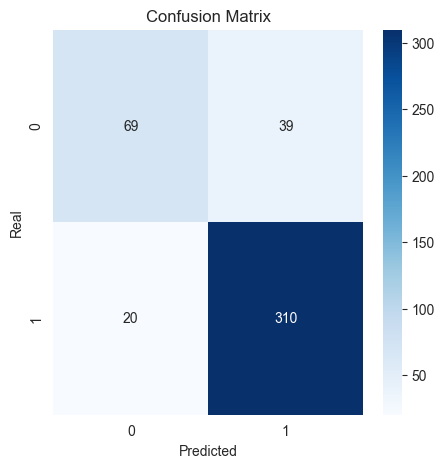

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcolare l'accuratezza
accuracy = accuracy_score(y_val, y_pred)
print(f"📊 Accuracy: {accuracy:.2f}")

# Report dettagliato
print(classification_report(y_val, y_pred))

# Matrice di confusione
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

In [36]:
# Fare previsioni sul test set
test_predictions = model.predict(X_test_scaled)

# Creare un file CSV con i risultati
submission = pd.DataFrame({"Id": test_df.index, "Rainfall": test_predictions})
submission.to_csv("submission.csv", index=False)

print("Predizioni salvate in 'submission.csv'")

✅ Predizioni salvate in 'submission.csv'
